# **NEWS SCRAPPING**

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
from urllib.parse import urljoin  # For joining URLs

def scrape_bbc_news():
    base_url = 'https://www.bbc.com'
    url = 'https://www.bbc.com/news'  # URL of the BBC News website
    data = []

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find sections/categories on the BBC News website
        sections = soup.find_all('a', class_='nw-o-link')

        for section in sections:
            section_name = section.text.strip()
            section_link = urljoin(base_url, section['href'])  # Join base URL with section link

            print(f"Scraping articles from '{section_name}' section...")
            section_data = scrape_section(section_link)
            data.extend(section_data)
            print("\n")

        # Save data to CSV file
        save_to_csv(data)

    else:
        print('Failed to fetch data from BBC News')

def scrape_section(section_url):
    section_data = []
    # Send a GET request to the section URL
    response = requests.get(section_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all article elements
        articles = soup.find_all('div', class_='gs-c-promo')

        # Extract titles and content of each article
        for article in articles:
            # Extract title
            title_element = article.find('h3', class_='gs-c-promo-heading__title')
            title = title_element.text.strip() if title_element else 'No title'

            # Extract content (if available)
            content_element = article.find('p', class_='gs-c-promo-summary')
            content = content_element.text.strip() if content_element else 'No content available'

            section_data.append({'Title': title, 'Content': content})

    else:
        print(f'Failed to fetch data from {section_url}')

    return section_data

def save_to_csv(data):
    # Define CSV file name
    file_name = 'bbc-text.csv'

    # Write data to CSV file
    with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Title', 'Content']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write header
        writer.writeheader()

        # Write rows
        for row in data:
            writer.writerow(row)

    print(f"Data saved to '{file_name}'")

# Call the function to initiate scraping and save data to CSV
scrape_bbc_news()

In [2]:
#DOWNLOAD NLTK
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

ModuleNotFoundError: No module named 'nltk'

In [2]:
pip install pattern


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.8/348.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=c6771752901477e332c79fc83fdec47fb4b3ef6c7767a51742ae5c604da5e38a
  Stored in direct

In [13]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import pattern
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

# *Data Cleaning and Preprocessing*

In [14]:
data = pd.read_csv('bbc-text.csv')
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [15]:
data.shape

(2225, 2)

In [16]:
data.isnull().sum()

category    0
text        0
dtype: int64

In [17]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [18]:
data.tail(10)

,category,text
2215,tech,junk e-mails on relentless rise spam traffic i...
2216,entertainment,top stars join us tsunami tv show brad pitt r...
2217,tech,rings of steel combat net attacks gambling is ...
2218,sport,davies favours gloucester future wales hooker ...
2219,business,beijingers fume over parking fees choking traf...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [19]:
data.columns

Index(['category', 'text'], dtype='object')

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Remove HTML tags and non-alphabetic characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reassemble text
    cleaned_text = ' '.join(tokens)

    # Remove extra spaces
    cleaned_text = re.sub(' +', ' ', cleaned_text)

    return cleaned_text

data['text'] = data['text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print(data[['text', 'text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  tv future hand viewer home theatre system plas...   
1  worldcom bos left book alone former worldcom b...   
2  tiger wary farrell gamble leicester say rushed...   
3  yeading face newcastle fa cup premiership side...   
4  ocean twelve raid box office ocean twelve crim...   

                                                text  
0  tv future hand viewer home theatre system plas...  
1  worldcom bos left book alone former worldcom b...  
2  tiger wary farrell gamble leicester say rushed...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raid box office ocean twelve crim...  


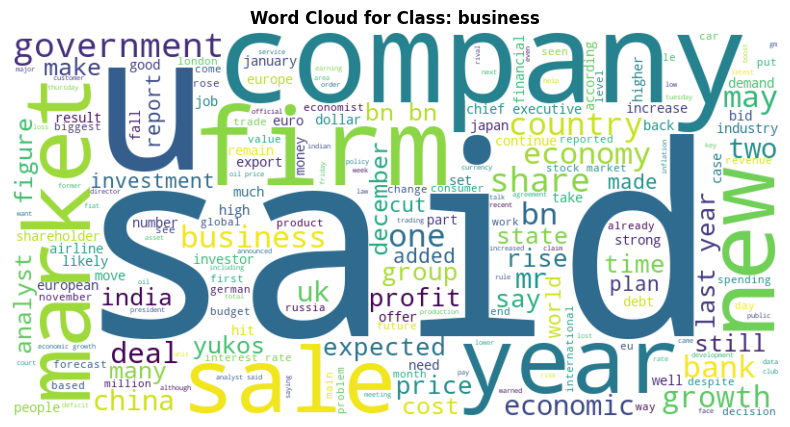

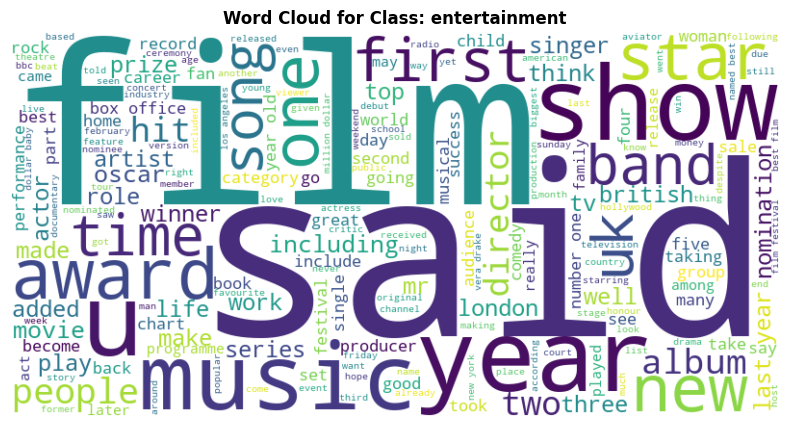

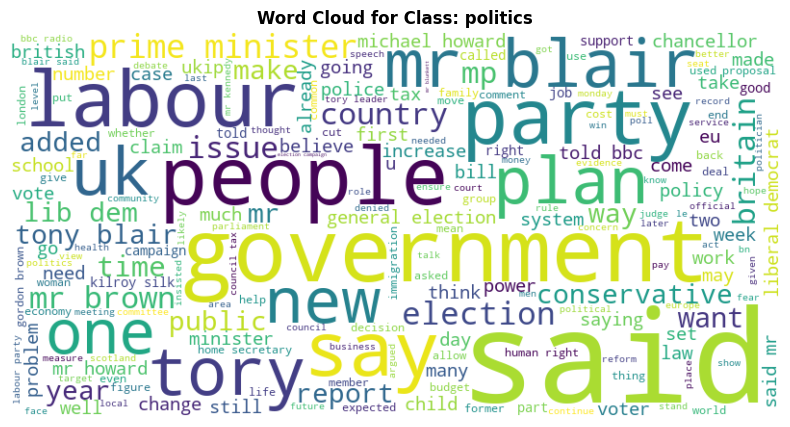

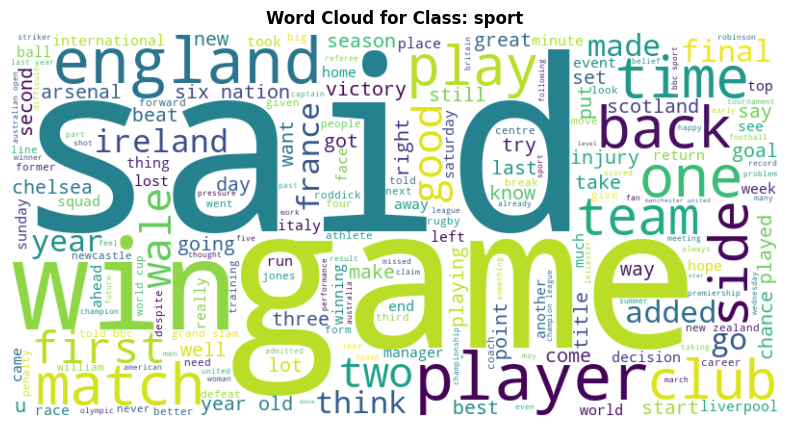

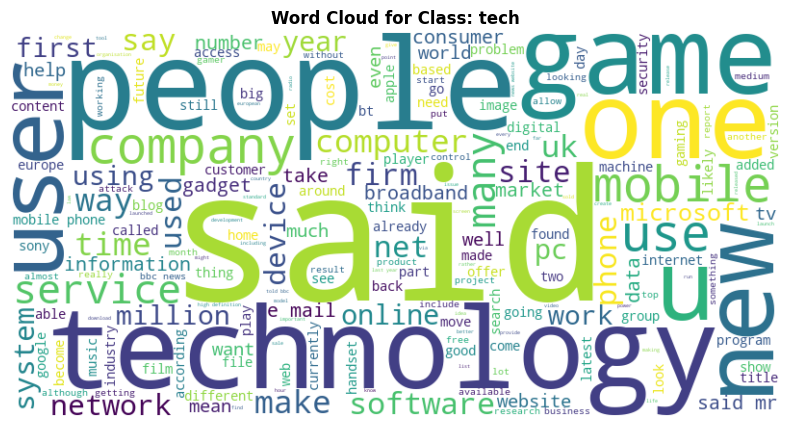

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text_processed' is the column containing processed text
def create_word_clouds(data, text_column_name):
    # Group the DataFrame by 'category' column
    grouped = data.groupby('category')

    # Iterate through each group (class)
    for category, group_data in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_data[text_column_name])

        # Generate a word cloud for the class
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud for the class
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Class: {category}', fontweight='bold')
        plt.axis('off')  # Turn off axis labels
        plt.show()

# Assuming 'text' is the column containing processed text
create_word_clouds(data, 'text')


# *Text Representation (TF-IDF)*

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with columns 'text' and 'label'

# Clean the text
data['text'] = data['text'].apply(clean_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['category'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# *Topic Clustering (K-means)*

In [23]:
from sklearn.cluster import KMeans

# Assuming you want to create 5 clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_tfidf)  # Use fit_predict instead of fit

# Add cluster labels to the training data
df_train = pd.DataFrame(X_train, columns=['text'])  # Assuming 'text' is the column name
df_train['cluster'] = cluster_labels




c:\Users\JAMUNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# *Topic Labeling*

In [24]:
# Manually inspect and assign topic labels to clusters
# You can create a mapping dictionary for cluster labels to topics

cluster_labels_to_topics = {
    0: 'Sports',
    1: 'Business',
    2: 'Politics',
    3: 'Weather',
    4: 'Other'
}

df_train['topic'] = df_train['cluster'].map(cluster_labels_to_topics)




# *Classification Model*  AND METRICS

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have 'df_train' with columns 'cleaned_text' and 'topic'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['topic'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

    Business       0.97      0.96      0.96        93
       Other       0.98      0.96      0.97        53
    Politics       0.95      0.97      0.96        58
      Sports       0.95      1.00      0.98        62
     Weather       1.00      0.98      0.99        90

    accuracy                           0.97       356
   macro avg       0.97      0.97      0.97       356
weighted avg       0.97      0.97      0.97       356



# *CONFUTION MATRIX & PLOT*

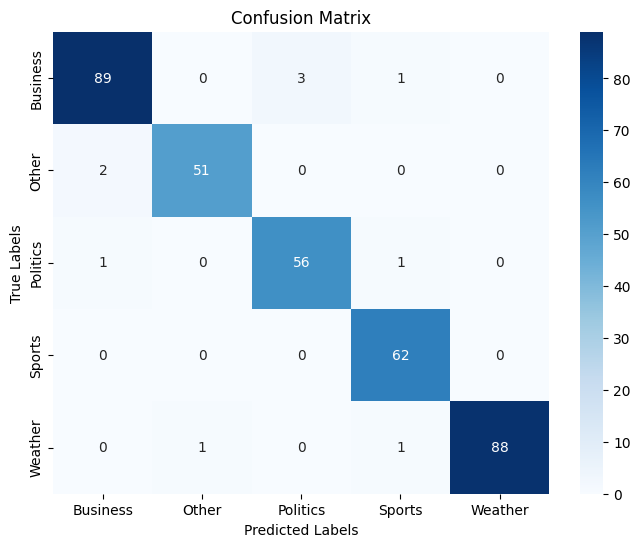

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_test' and 'y_pred' from your code

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df_train['topic'].unique()),
            yticklabels=sorted(df_train['topic'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# **GUI (STREAMLIT)**

In [31]:
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reassemble text
    cleaned_text = ' '.join(tokens)

    return cleaned_text


# Function to predict topic
def predict_topic(text):
    cleaned_text = clean_text(text)
    tfidf_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = nb_classifier.predict(tfidf_text)
    return prediction[0]

# Load the data
data = pd.read_csv("C:/Users/JAMUNA/bbc-text.csv")


# Clean the text
data['text'] = data['text'].apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_tfidf)

# Add cluster labels to the data
data['cluster'] = cluster_labels

# Manually assign topic labels to clusters
cluster_labels_to_topics = {
    0: 'Sports',
    1: 'Business',
    2: 'Politics',
    3: 'Weather',
    4: 'Other'
}
data['topic'] = data['cluster'].map(cluster_labels_to_topics)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_tfidf, data['topic'])

# Streamlit UI
st.title("Text Classification App")

user_input = st.text_area("Enter text:")
if st.button("Predict Topic"):
    prediction = predict_topic(user_input)
    st.success(f"Predicted Topic: {prediction}")

# Evaluate the model on the entire dataset
y_true = data['topic']
y_pred = nb_classifier.predict(X_tfidf)
accuracy = accuracy_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

# Display accuracy and classification report
st.write(f"Accuracy: {accuracy:.2f}")
st.text("Classification Report:")
st.text(classification_rep)

# Confusion Matrix Plot
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(data['topic'].unique()),
            yticklabels=sorted(data['topic'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display confusion matrix plot in Streamlit
st.pyplot()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JAMUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\JAMUNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
2024-02-10 09:48:59.500 
  command:

    streamlit run C:\Users\JAMUNA\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

<Figure size 800x600 with 0 Axes>